Using MODIS Ocean Color L2 Data with `xarray`

In [ ]:
pip install netcdf4 xrft spectrum rioxarray

     |████████████████████████████████| 3.7MB 2.7MB/s 
     |████████████████████████████████| 18.1MB 239kB/s 
     |████████████████████████████████| 10.4MB 42.7MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.0.26-cp36-none-any.whl size=36920 sha256=aedc9d2d618bdf8ba217fe848c91836b3fd83eebe096b8df4f008e88fcfcdac1
  Stored in directory: /root/.cache/pip/wheels/02/db/70/cea66fb64cee13bc3acd2b577f5c266c17424e454016324db0
Successfully built rioxarray


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, ticker
import xrft
import rioxarray
import xarray as xr
%matplotlib inline
# data from https://oceandata.sci.gsfc.nasa.gov/ob/getfile/A2020113184000.L2_LAC_OC.nc
#fn = 'A2020113184000.L2_LAC_OC.nc'
fn = 'AQUA_MODIS.20200422T184001.L2.SST.NRT.nc'
#fn = 'A2019338181500.L2_LAC_OC.nc'

After opening with `xarray` it doesn't have any dimensions, coordinates, or data variables

In [ ]:
xds = xr.open_dataset(fn)
# this does work to get a single group but is missing other details
# xds = xr.open_dataset(fn, group='geophysical_data')
xds

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    title:                          MODISA Level-2 Data
    product_name:                   AQUA_MODIS.20200422T184001.L2.SST.NRT.nc
    processing_version:             R2019.0
    equatorCrossingLongitude:       132.25525
    orbit_number:                   95618
    history:                        l2gen par=/data7/sdpsoper/vdc/vpu6/workbu...
    instrument:                     MODIS
    platform:                       Aqua
    Conventions:                    CF-1.6 ACDD-1.3
    license:                        https://science.nasa.gov/earth-science/ea...
    naming_authority:               gov.nasa.gsfc.sci.oceandata
    id:                             R2019.0/L2/AQUA_MODIS.20200422T184001.L2....
    date_created:                   2020-04-22T20:29:14.000Z
    keywords_vocabulary:            NASA Global Change Master Directory (GCMD...
    keywords:                       Earth Science > Oceans > Ocean Optics > S...
    standard_name_vocabulary:       CF Standard Name Table v36
    institution:                    NASA Goddard Space Flight Center, Ocean E...
    creator_name:                   NASA/GSFC/OBPG
    creator_email:                  data@oceancolor.gsfc.nasa.gov
    creator_url:                    https://oceandata.sci.gsfc.nasa.gov
    project:                        Ocean Biology Processing Group (NASA/GSFC...
    publisher_name:                 NASA/GSFC/OBPG
    publisher_url:                  https://oceandata.sci.gsfc.nasa.gov
    publisher_email:                data@oceancolor.gsfc.nasa.gov
    processing_level:               L2
    cdm_data_type:                  swath
    equatorCrossingDateTime:        2020-04-22T18:03:22.950Z
    spatialResolution:              1 km
    time_coverage_start:            2020-04-22T18:40:01.982Z
    time_coverage_end:              2020-04-22T18:44:58.882Z
    start_center_longitude:         -79.21323
    start_center_latitude:          20.922237
    end_center_longitude:           -83.937874
    end_center_latitude:            38.84687
    northernmost_latitude:          40.026325
    southernmost_latitude:          18.94642
    easternmost_longitude:          -68.037674
    westernmost_longitude:          -96.73641
    geospatial_lat_units:           degrees_north
    geospatial_lon_units:           degrees_east
    geospatial_lat_max:             40.026325
    geospatial_lat_min:             18.94642
    geospatial_lon_max:             -68.037674
    geospatial_lon_min:             -96.73641
    startDirection:                 Ascending
    endDirection:                   Ascending
    day_night_flag:                 Day
    earth_sun_distance_correction:  0.9892532825469971

But all the data exists when opening it with the `netCDF4` module

In [ ]:
from netCDF4 import Dataset
dataset = Dataset(fn)
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: MODISA Level-2 Data
    product_name: AQUA_MODIS.20200422T184001.L2.SST.NRT.nc
    processing_version: R2019.0
    equatorCrossingLongitude: 132.25525
    orbit_number: 95618
    history: l2gen par=/data7/sdpsoper/vdc/vpu6/workbuf/A2020113184000.L1B_LAC.param metafile=AQUA_MODIS.20200422T184001.L2.SST.NRT.nc.meta
    instrument: MODIS
    platform: Aqua
    Conventions: CF-1.6 ACDD-1.3
    license: https://science.nasa.gov/earth-science/earth-science-data/data-information-policy/
    naming_authority: gov.nasa.gsfc.sci.oceandata
    id: R2019.0/L2/AQUA_MODIS.20200422T184001.L2.SST.NRT.nc
    date_created: 2020-04-22T20:29:14.000Z
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    keywords: Earth Science > Oceans > Ocean Optics > Sea Surface Temperature
    standard_name_vocabulary: CF Standard Name Table v36
    institution: NASA Goddard Space Flight Ce

In [ ]:
gd=dataset.groups['geophysical_data']
nav=dataset.groups['navigation_data']
lons = nav.variables["longitude"][:]
lats = nav.variables["latitude"][:]

flags= gd.variables["l2_flags"][:]
gd.variables.keys()

odict_keys(['sst', 'qual_sst', 'flags_sst', 'bias_sst', 'stdv_sst', 'sstref', 'l2_flags'])

In [ ]:
gd.variables['sst'][:]

masked_array(
  data=[[25.23499870300293, 25.939998626708984, 26.01999855041504, ...,
         --, --, --],
        [25.274999618530273, 25.875, 25.8799991607666, ..., --, --, --],
        [24.809999465942383, 26.21500015258789, 26.114999771118164, ...,
         --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-32767,
  dtype=float32)

In [ ]:
lats.data.shape

(2030, 1354)

In [ ]:
# create the sst dataset
sst_xds = xr.Dataset({'sst':(('x', 'y'),gd.variables['sst'][:].data)},
                    coords = {'latitude': (('x', 'y'), lats),
                              'longitude': (('x', 'y'), lons)},
                    attrs={'variable':'Sea Surface Temp'})
sst_xds

<xarray.Dataset>
Dimensions:    (x: 2030, y: 1354)
Coordinates:
    latitude   (x, y) float32 22.104599 22.101328 22.098068 ... nan nan nan
    longitude  (x, y) float32 -68.037674 -68.084114 -68.1302 ... nan nan nan
Dimensions without coordinates: x, y
Data variables:
    sst        (x, y) float32 25.234999 25.939999 ... -32767.0 -32767.0
Attributes:
    variable:  Sea Surface Temp

We can use the data from `netCDF4` to create the `xarray` dataset but this feels clunky

In [ ]:
# create the chl dataset
chl_xds = xr.Dataset({'chlor_a':(('x', 'y'),gd.variables['chlor_a'][:].data)},
                    coords = {'latitude': (('x', 'y'), lats),
                              'longitude': (('x', 'y'), lons)},
                    attrs={'variable':'Chlorophyll-a'})
chl_xds

KeyError: ignored

In [ ]:
# merge back into the xarray dataset with all the attributes
xds['sst'] = sst_xds.sst
# replace nodata areas with nan
xds = xds.where(xds['sst'] != -32767.0)
xds

<xarray.Dataset>
Dimensions:    (x: 2030, y: 1354)
Coordinates:
    latitude   (x, y) float32 22.104599 22.101328 22.098068 ... nan nan nan
    longitude  (x, y) float32 -68.037674 -68.084114 -68.1302 ... nan nan nan
Dimensions without coordinates: x, y
Data variables:
    sst        (x, y) float32 25.234999 25.939999 26.019999 ... nan nan nan
Attributes:
    title:                          MODISA Level-2 Data
    product_name:                   AQUA_MODIS.20200422T184001.L2.SST.NRT.nc
    processing_version:             R2019.0
    equatorCrossingLongitude:       132.25525
    orbit_number:                   95618
    history:                        l2gen par=/data7/sdpsoper/vdc/vpu6/workbu...
    instrument:                     MODIS
    platform:                       Aqua
    Conventions:                    CF-1.6 ACDD-1.3
    license:                        https://science.nasa.gov/earth-science/ea...
    naming_authority:               gov.nasa.gsfc.sci.oceandata
    id:                             R2019.0/L2/AQUA_MODIS.20200422T184001.L2....
    date_created:                   2020-04-22T20:29:14.000Z
    keywords_vocabulary:            NASA Global Change Master Directory (GCMD...
    keywords:                       Earth Science > Oceans > Ocean Optics > S...
    standard_name_vocabulary:       CF Standard Name Table v36
    institution:                    NASA Goddard Space Flight Center, Ocean E...
    creator_name:                   NASA/GSFC/OBPG
    creator_email:                  data@oceancolor.gsfc.nasa.gov
    creator_url:                    https://oceandata.sci.gsfc.nasa.gov
    project:                        Ocean Biology Processing Group (NASA/GSFC...
    publisher_name:                 NASA/GSFC/OBPG
    publisher_url:                  https://oceandata.sci.gsfc.nasa.gov
    publisher_email:                data@oceancolor.gsfc.nasa.gov
    processing_level:               L2
    cdm_data_type:                  swath
    equatorCrossingDateTime:        2020-04-22T18:03:22.950Z
    spatialResolution:              1 km
    time_coverage_start:            2020-04-22T18:40:01.982Z
    time_coverage_end:              2020-04-22T18:44:58.882Z
    start_center_longitude:         -79.21323
    start_center_latitude:          20.922237
    end_center_longitude:           -83.937874
    end_center_latitude:            38.84687
    northernmost_latitude:          40.026325
    southernmost_latitude:          18.94642
    easternmost_longitude:          -68.037674
    westernmost_longitude:          -96.73641
    geospatial_lat_units:           degrees_north
    geospatial_lon_units:           degrees_east
    geospatial_lat_max:             40.026325
    geospatial_lat_min:             18.94642
    geospatial_lon_max:             -68.037674
    geospatial_lon_min:             -96.73641
    startDirection:                 Ascending
    endDirection:                   Ascending
    day_night_flag:                 Day
    earth_sun_distance_correction:  0.9892532825469971

In [ ]:
# merge back into the xarray dataset with all the attributes
xds['chlor_a'] = chl_xds.chlor_a
# replace nodata areas with nan
xds = xds.where(xds['chlor_a'] != -32767.0)
xds

<xarray.Dataset>
Dimensions:    (x: 2030, y: 1354)
Coordinates:
    latitude   (x, y) float32 22.104599 22.101328 22.098068 ... nan nan nan
    longitude  (x, y) float32 -68.037674 -68.084114 -68.1302 ... nan nan nan
Dimensions without coordinates: x, y
Data variables:
    chlor_a    (x, y) float32 nan nan 0.055656917 0.048961785 ... nan nan nan
Attributes:
    title:                             MODISA Level-2 Data
    product_name:                      A2020113184000.L2_LAC_OC.nc
    processing_version:                2018.1QLP
    equatorCrossingLongitude:          132.25525
    orbit_number:                      95618
    history:                           l2gen par=/data12/sdpsoper/vdc/vpu23/w...
    instrument:                        MODIS
    platform:                          Aqua
    Conventions:                       CF-1.6 ACDD-1.3
    license:                           https://science.nasa.gov/earth-science...
    naming_authority:                  gov.nasa.gsfc.sci.oceandata
    id:                                2018.1QLP/L2/A2020113184000.L2_LAC_OC.nc
    date_created:                      2020-04-22T20:26:22.000Z
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    keywords:                          Earth Science > Oceans > Ocean Optics ...
    standard_name_vocabulary:          CF Standard Name Table v36
    institution:                       NASA Goddard Space Flight Center, Ocea...
    creator_name:                      NASA/GSFC/OBPG
    creator_email:                     data@oceancolor.gsfc.nasa.gov
    creator_url:                       https://oceandata.sci.gsfc.nasa.gov
    project:                           Ocean Biology Processing Group (NASA/G...
    publisher_name:                    NASA/GSFC/OBPG
    publisher_url:                     https://oceandata.sci.gsfc.nasa.gov
    publisher_email:                   data@oceancolor.gsfc.nasa.gov
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/AQUA/MODIS/L2/OC/2018
    processing_level:                  L2
    cdm_data_type:                     swath
    equatorCrossingDateTime:           2020-04-22T18:03:22.950Z
    spatialResolution:                 1 km
    time_coverage_start:               2020-04-22T18:40:01.982Z
    time_coverage_end:                 2020-04-22T18:44:58.882Z
    start_center_longitude:            -79.21323
    start_center_latitude:             20.922237
    end_center_longitude:              -83.937874
    end_center_latitude:               38.84687
    northernmost_latitude:             40.026325
    southernmost_latitude:             18.94642
    easternmost_longitude:             -68.037674
    westernmost_longitude:             -96.73641
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    geospatial_lat_max:                40.026325
    geospatial_lat_min:                18.94642
    geospatial_lon_max:                -68.037674
    geospatial_lon_min:                -96.73641
    startDirection:                    Ascending
    endDirection:                      Ascending
    day_night_flag:                    Day
    earth_sun_distance_correction:     0.9892532825469971

In [ ]:
xds_crs = xds.rio.write_crs(4326)
xds_crs.rio.crs

CRS.from_epsg(4326)

In [ ]:
xds_crs.rio.to_raster('sst.tif')

InvalidDimensionOrder: ignored

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


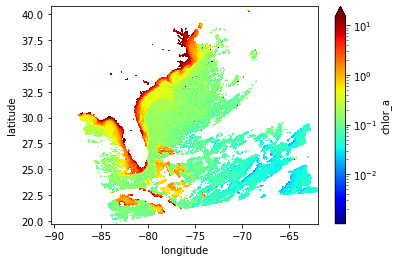

In [ ]:
#.sel(x=slice(800, 1700),y=slice(300,900))
xds.chlor_a[:-10,:-10].plot(x='longitude', y='latitude', vmax=15, cmap='jet', norm=colors.LogNorm())

(-77.0, -73.5)

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


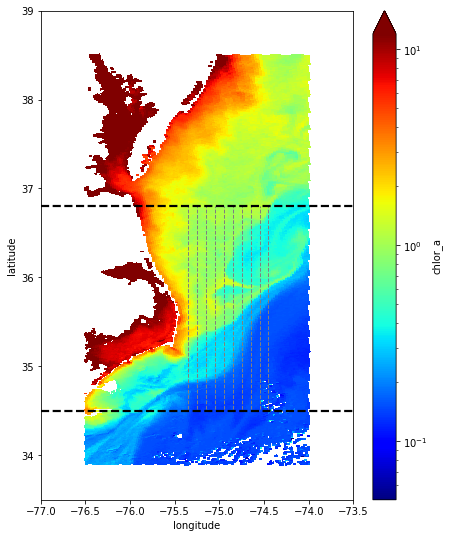

In [ ]:
fig, ax = plt.subplots(figsize=(7,9))
xds_subset = xds.where((xds.latitude>=33.9) & (xds.latitude<=38.5), drop=True)
xds_subset = xds_subset.where((xds_subset.longitude>=-76.5) & (xds_subset.longitude<=-74), drop=True)
xds_subset.chlor_a.plot(ax=ax, x='longitude', y='latitude', vmax=12, cmap='jet', norm=colors.LogNorm())
for longitude_idx in indexes:
  lon = (start_bin + increment/2)[longitude_idx]
  ax.axvline(lon, ymin=.185, ymax=.60, ls='--', color='gray', alpha=1, linewidth=1)

ax.axhline(36.8, ls='--', color='black', alpha=1, linewidth=2.2)
ax.axhline(34.5, ls='--', color='black', alpha=1, linewidth=2.2)
ax.set_ylim(33.5,39)
ax.set_xlim(-77,-73.5)

AttributeError: ignored

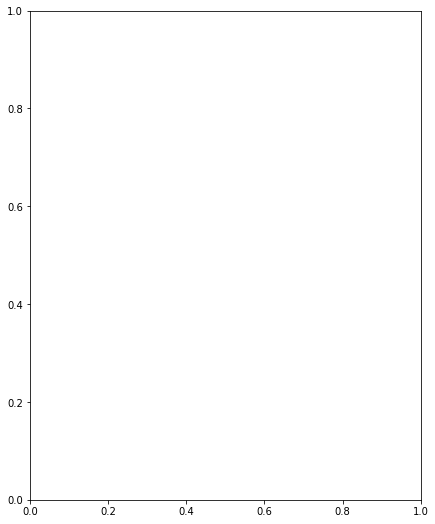

In [ ]:
fig, ax = plt.subplots(figsize=(7,9))
xds_subset = xds.where((xds.latitude>=33.9) & (xds.latitude<=38.5), drop=True)
xds_subset = xds_subset.where((xds_subset.longitude>=-76.5) & (xds_subset.longitude<=-74), drop=True)
xds_subset.sst.plot(ax=ax, x='longitude', y='latitude', vmin=8, vmax=26, cmap='jet')
for longitude_idx in indexes:
  lon = (start_bin + increment/2)[longitude_idx]
  ax.axvline(lon, ymin=.12, ymax=.713, ls='--', color='gray', alpha=1, linewidth=1)

ax.axhline(38, ls='--', color='black', alpha=1, linewidth=2.2)
ax.axhline(34.2, ls='--', color='black', alpha=1, linewidth=2.2)

(-77.0, -72.0)

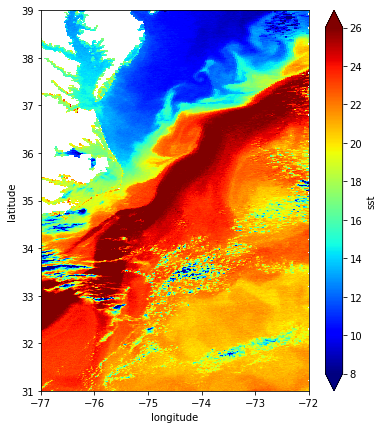

In [ ]:
fig, ax = plt.subplots(figsize=(6,7))
xds_subset = xds.where((xds.latitude>=30) & (xds.latitude<=40), drop=True)
xds_subset = xds_subset.where((xds_subset.longitude>=-78) & (xds_subset.longitude<=-72), drop=True)
xds_subset.sst.plot(ax=ax, x='longitude', y='latitude', vmin=8, vmax=26, cmap='jet')

ax.set_ylim(31,39)
ax.set_xlim(-77,-72)

In [ ]:
increment = 0.1
start_bin = np.arange(-76.5, -74,increment)
stop_bin = np.arange(-76.5+increment, -74+increment,increment)

In [ ]:
# groupby example based on http://xarray.pydata.org/en/stable/examples/multidimensional-coords.html
# define two-degree wide latitude bins
lon_bins = np.arange(34.2, 38,0.01)
#lon_bins = np.arange(34.5, 36.8,0.01)
# define a label for each bin corresponding to the central latitude
lon_center = lon_bins[1:]

second_oc_mean_list = []
#oc_mean_list = []
#sst_mean_list = []

# group according to those bins and take the mean
for idx, long in enumerate(start_bin):
  oc_lat_mean = xds_subset.where((xds_subset.longitude>=start_bin[idx]) & (xds_subset.longitude<=stop_bin[idx]), 
                                 drop=True).chlor_a.groupby_bins('latitude', lon_bins, labels=lon_center).mean(dim=xr.ALL_DIMS, skipna=True)
  second_oc_mean_list.append(oc_lat_mean)
  #oc_mean_list.append(oc_lat_mean)
  #sst_mean_list.append(oc_lat_mean)

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  re

In [ ]:
longitude_idx = 21
# longitude
# [11,12,13,14,15,16,17,18,19,20,21,22,23]
# [11,12,13,14,15,16,17,18,19,20]
# 11, 12[:-2], 13, 14, 15, 16, 17[2:], 18, 19, 20?, 21[:-3], 22, 23[2:-4],
(start_bin + increment/2)[longitude_idx]

-74.15000000000013

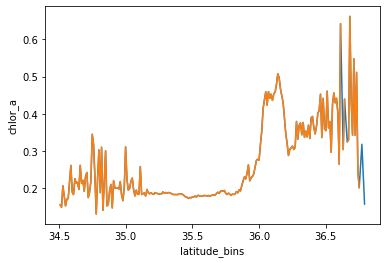

In [ ]:
oc_mean_list[longitude_idx].interpolate_na(dim='latitude_bins', method='linear', limit=None, max_gap=0.5).plot()
oc_mean_list[longitude_idx].plot()

In [ ]:
linear_subset = oc_mean_list[longitude_idx].interpolate_na(dim='latitude_bins', method='linear', limit=None, max_gap=0.5)
#sst_linear_subset = sst_mean_list[longitude_idx].interpolate_na(dim='latitude_bins', method='linear', limit=None, max_gap=0.5)
np.argwhere(np.isnan(np.array(sst_linear_subset)))

array([], shape=(0, 1), dtype=int64)

In [ ]:
indexes = [11,12,13,14,15,16,17,18,19,20,21,22,23]
#indexes = [11,12,13,14,15,16,17,18,19,20]
#indexes = [11, 15, 19, 23]
#linear_subsets = []
#oc_linear_subsets = []
second_oc_linear_subsets = []
for idx in indexes:
  second_oc_linear_subsets.append(second_oc_mean_list[idx].interpolate_na(dim='latitude_bins', method='linear', limit=None, max_gap=0.5)[2:-4])
  #sst_linear_subsets.append(sst_mean_list[idx].interpolate_na(dim='latitude_bins', method='linear', limit=None, max_gap=0.5)[2:-4])

(0.0, 3.2)

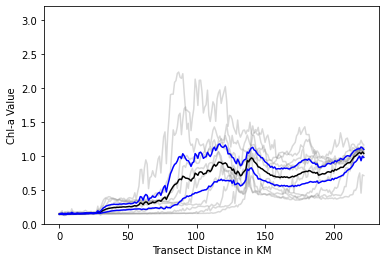

In [ ]:
linear_subsets = np.array(second_oc_linear_subsets)
#linear_subsets = np.array(sst_linear_subsets)

for transect in linear_subsets:
  plt.plot(transect, color='grey', alpha=.3)

plt.plot(np.mean(linear_subsets, axis=0), color='black')
plt.plot(np.mean(linear_subsets, axis=0) + np.std(linear_subsets, axis=0)/2, color='blue', alpha=1)
plt.plot(np.mean(linear_subsets, axis=0) - np.std(linear_subsets, axis=0)/2, color='blue', alpha=1)
plt.xlabel('Transect Distance in KM')
#plt.ylabel('SST Value')
plt.ylabel('Chl-a Value')
#plt.yscale('log')
plt.ylim(0, 3.2)
#plt.ylim(7, 30)
#plt.plot(np.std(linear_subsets, axis=0))

#x = np.linspace(0,linear_subsets.shape[1]-1,linear_subsets.shape[1])
#y = np.mean(linear_subsets, axis=0)
# error = np.std(linear_subsets, axis=0) / 2

#plt.plot(x, y)
#plt.fill_between(x, y-error, y+error)

#plt.plot(x, np.amax(linear_subsets, axis=0))
#plt.plot(x, np.amin(linear_subsets, axis=0))

#plt.errorbar(x, y, e, linestyle='None', marker='^')

#for line in linear_subsets:
#  plt.plot(line)



In [ ]:
oc_transects.shape

(13, 373)

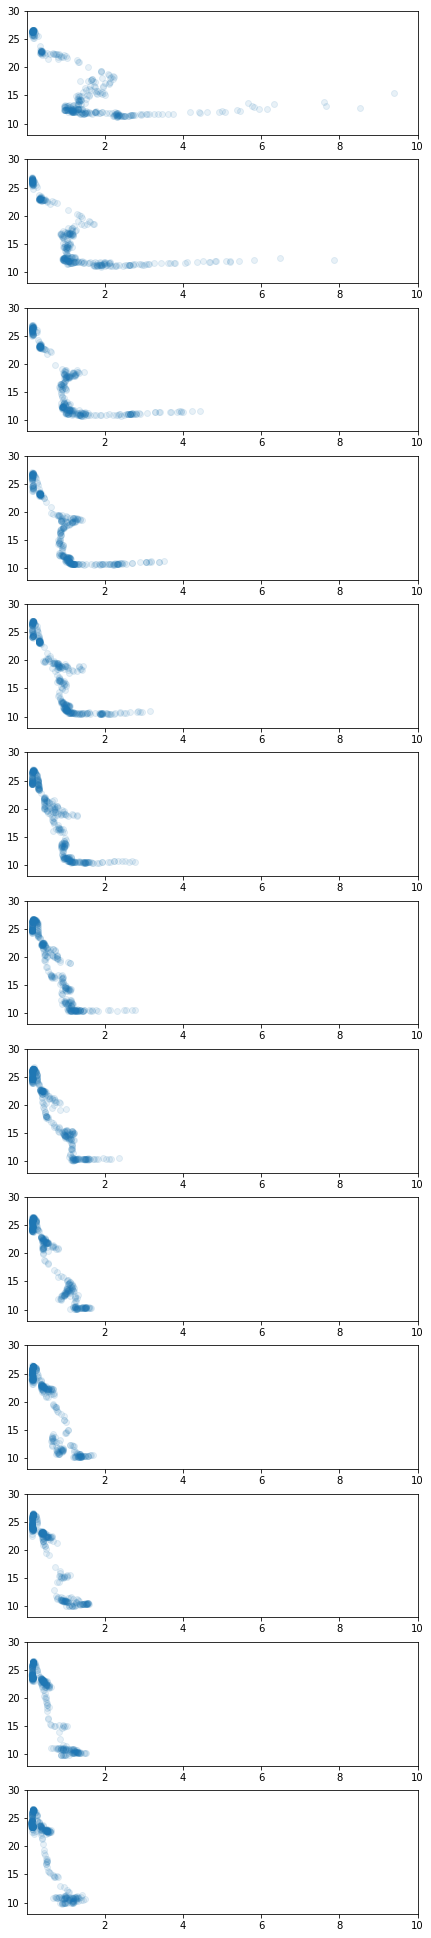

In [ ]:
fig, ax = plt.subplots(13,1, figsize=(7,35))
oc_transects = np.array(second_oc_linear_subsets)
sst_transects = np.array(sst_linear_subsets)
transect_idx = 0
for oc, sst in zip(oc_transects, sst_transects):
  ax[transect_idx].scatter(oc, sst, alpha=0.1)
  #ax[transect_idx].set_xscale('log')
  ax[transect_idx].set_xlim(.01,10)
  ax[transect_idx].set_ylim(8,30)
  transect_idx += 1

In [ ]:
#sst_var_freq = []
#oc_var_freq = []
second_oc_var_freq = []
dx_of_pix = 1

for xrline in second_oc_linear_subsets:
  #powerspec = xrft.power_spectrum(xrline, density=True, detrend='linear')
  #all_powerspecs.append(np.array(powerspec))
  variance, freqs = pmtm_spec_and_freqs(np.array(xrline), dx_of_pix, show=False)
  second_oc_var_freq.append([variance, freqs])

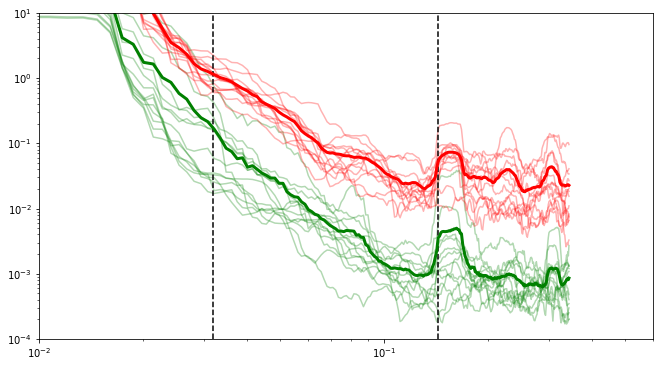

In [ ]:
fig, ax = plt.subplots(figsize=(11,6))
for var, freq in second_oc_var_freq:
  ax.plot(freq, var, label='Chl-a Variance Spectrum', alpha=0.3, color='green')

for var, freq in sst_var_freq:
  ax.plot(freq, var, label='Chl-a Variance Spectrum', alpha=0.3, color='red')

#for var, freq in oc_var_freq:
#  ax.plot(freq, var, label='Chl-a Variance Spectrum', alpha=0.3, color='blue')
  
# MODIS / VIIRS
ax.axvline(1/(250/8), ls='--', color='black')
ax.axvline(1/(1*7), ls='--', color='black')
#plt.axvspan(1/(1*7), 1/(1000/8), alpha=0.08, color='green')
#ax.axvline(1/10, ls='--', color='black')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.01, .6)
ax.set_ylim(1e-4, 10)
#plt.plot(all_powerspecs)
# just plotting normal -5/3 line
#ax.plot(var_freq[0][1][20:], np.power(var_freq[0][1][20:], -5/3), label='-5/3 power law')

# average line
ax.plot(second_oc_var_freq[0][1], np.mean(np.array(second_oc_var_freq)[:,0,:],axis=0), color='green', linewidth=3)
#ax.plot(oc_var_freq[0][1], np.mean(np.array(oc_var_freq)[:,0,:],axis=0), color='blue', linewidth=3)
ax.plot(sst_var_freq[0][1], np.mean(np.array(sst_var_freq)[:,0,:],axis=0), color='red', linewidth=3)

(0.01, 300)

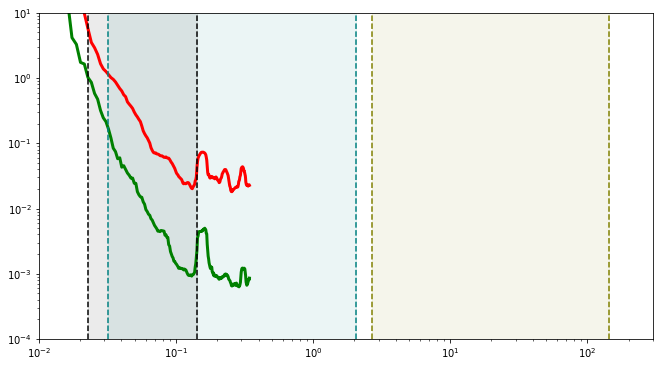

In [ ]:
fig, ax = plt.subplots(figsize=(11,6))

ax.plot(second_oc_var_freq[0][1], np.mean(np.array(second_oc_var_freq)[:,0,:],axis=0), color='green', linewidth=3)
ax.plot(sst_var_freq[0][1], np.mean(np.array(sst_var_freq)[:,0,:],axis=0), color='red', linewidth=3)

# MODIS / VIIRS
plt.axvline(1/(350/8), ls='--', color='black')
plt.axvline(1/(1*7), ls='--', color='black')
plt.axvspan(1/(1*7), 1/(350/8), alpha=0.08, color='black')

# ECOSTRESS
plt.axvline(1/(250/8), ls='--', color='teal')
plt.axvline(1/(0.070*7), ls='--', color='teal')
plt.axvspan(1/(0.070*7), 1/(250/8), alpha=0.08, color='teal')

# UAS
plt.axvline(1/(3/8), ls='--', color='olive')
plt.axvline(1/(0.001*7), ls='--', color='olive')
plt.axvspan(1/(0.001*7), 1/(3/8), alpha=0.08, color='olive')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-4, 10)
ax.set_xlim(0.01, 300)

In [ ]:
from spectrum import *

# based on https://github.com/cokelaer/spectrum/blob/master/src/spectrum/mtm.py
# docs here http://thomas-cokelaer.info/software/spectrum/html/user/ref_mtm.html?highlight=pmtm#spectrum.mtm.pmtm
# info from https://stackoverflow.com/questions/50655953/understanding-the-frequency-axis-of-multitaper-method-in-python

input_samples = np.array(linear_subsets[3])
dx_of_pix = 1

def pmtm_spec_and_freqs(input_samples, dx_of_pix, NW=4, show=False):
  Sk_complex, weights, eigenvalues = pmtm(input_samples, NW=NW, method='adapt')

  Sk = abs(Sk_complex)**2
  Sk = np.mean(Sk.T * weights, axis=1)

  # calculate frequency bins based on f = x / NFFT * (sampling rate in Hz or 1/dx of pixels))
  NFFT = max(256, 2**nextpow2(len(input_samples)))
  bins = np.linspace(1,NFFT,NFFT)
  f = bins / NFFT * (1/dx_of_pix)
  # then we need to adjust them by the diff of the transect count and NFFT/2
  freq = f[:int(Sk.shape[0]/2)] * 1/(input_samples.shape[0]/int(Sk.shape[0]/2))
  # only take the first half of the values because the second half is the negative set
  real_var = Sk[:int(Sk.shape[0]/2)]

  if show:
    # plot the area that is viable based on Ana's quoted numbers
    plt.axvline(1/(700/8), ls='--', color='green')
    plt.axvline(1/(2*7), ls='--', color='green')

    plt.plot(freq, real_var)
    plt.xscale('log')
    plt.yscale('log')

  return(real_var, freq)